# Abhiek Bist

I am intrested in determining the corelation between airquality and temperature

## Question 2 (Abhiek): Which elements are highly correlated to temperature?

###Observations: 
PTS08.S2 is the strongest postively correlated element in our dataset.
Relative Humidity(%) is the strongest negatively correlated element in our dataset.

###Conclusion: 
None of the elements ,except RH, in our data strongly corelate to Temperature. Therefore, none of these metal oxides can be used as a predictor for temperature.


# Loading Data

In [38]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from project_functions2 import *

data = load_and_clean("../data/raw/AirQuality.csv")
data = fix_Data(data)
data = fix_Time(data)
display(data)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,MONTH,HOUR
0,2004-03-10,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3,18
1,2004-03-10,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3,19
2,2004-03-10,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,3,20
3,2004-03-10,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3,21
4,2004-03-10,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,2004-04-30,20.00.00,4.4,1449.0,501.0,19.5,1282.0,254.0,625.0,133.0,2100.0,1569.0,19.1,61.1,1.3345,4,20
1227,2004-04-30,21.00.00,3.1,1363.0,234.0,15.1,1152.0,189.0,684.0,110.0,1951.0,1495.0,18.2,65.4,1.3529,4,21
1228,2004-04-30,22.00.00,3.0,1371.0,212.0,14.6,1136.0,174.0,689.0,102.0,1927.0,1471.0,18.1,66.1,1.3579,4,22
1229,2004-04-30,23.00.00,3.1,1406.0,275.0,13.7,1107.0,167.0,718.0,108.0,1872.0,1384.0,17.7,66.9,1.3422,4,23


# EDA

In [39]:
print(data.shape)
sns.set_theme(style='dark',font_scale=1)

(851, 17)


In [40]:
data.max(axis=0)

DATE            2004-05-01 00:00:00
TIME                       23.00.00
CO_GT                           8.1
PT08_S1_CO                   2040.0
NMHC_GT                      1189.0
C6H6_GT                        39.2
PT08_S2_NMHC                 1754.0
NOX_GT                        478.0
PT08_S3_NOX                  1935.0
NO2_GT                        196.0
PT08_S4_NO2                  2679.0
PT08_S5_O3                   2359.0
T                              30.0
RH                             83.2
AH                           1.4852
MONTH                             5
HOUR                             23
dtype: object

In [41]:
data.min(axis=0)

DATE            2004-03-10 00:00:00
TIME                       00.00.00
CO_GT                        -200.0
PT08_S1_CO                    753.0
NMHC_GT                         7.0
C6H6_GT                         0.5
PT08_S2_NMHC                  448.0
NOX_GT                         10.0
PT08_S3_NOX                   461.0
NO2_GT                         17.0
PT08_S4_NO2                   955.0
PT08_S5_O3                    263.0
T                               6.1
RH                             14.9
AH                           0.4023
MONTH                             3
HOUR                              0
dtype: object

Text(0.5, 1.0, 'co-relation between variables')

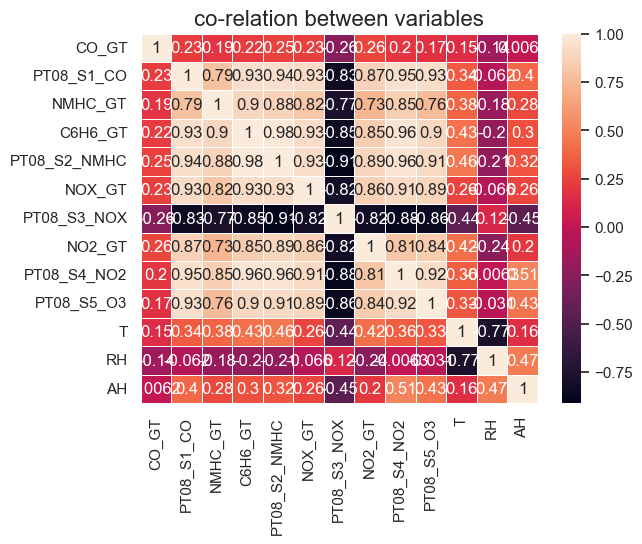

In [42]:
df1 = data.drop(['MONTH','HOUR'],axis = 1)
sns.heatmap(df1.corr(),annot=True, linewidths=.4)
plt.title('co-relation between variables',fontsize=16)

In [43]:
df1 = data.corr()

df1 = df1["T"].sort_values( axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

display(df1)

T               1.000000
PT08_S2_NMHC    0.458062
C6H6_GT         0.430433
NO2_GT          0.419571
NMHC_GT         0.378894
PT08_S4_NO2     0.357566
PT08_S1_CO      0.339539
PT08_S5_O3      0.325040
HOUR            0.322722
MONTH           0.296584
NOX_GT          0.256715
AH              0.163029
CO_GT           0.153190
PT08_S3_NOX    -0.438293
RH             -0.771049
Name: T, dtype: float64

<AxesSubplot:>

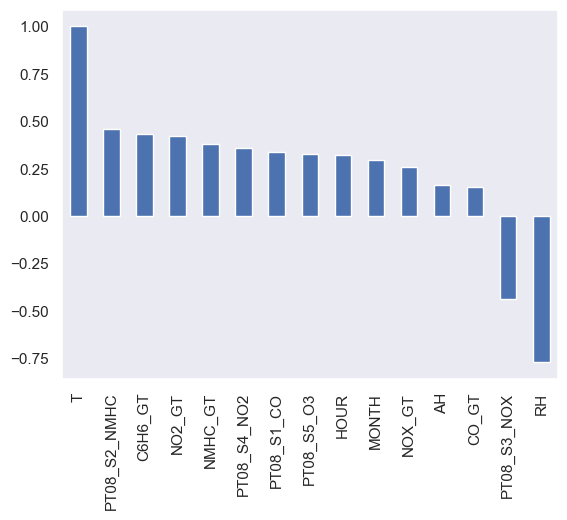

In [44]:
df1.plot.bar()

### PTO8_S2_NHMC (titania) has the strongest correlation among other metals oxides

<AxesSubplot:xlabel='(C°)', ylabel='PT08.S2 (titania)'>

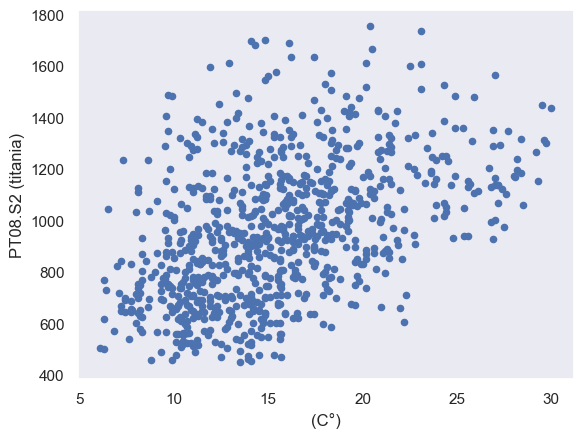

In [45]:
data.plot(kind='scatter', x='T', y='PT08_S2_NMHC' ,xlabel= "(C°)",ylabel="PT08.S2 (titania)")

In [46]:
#Not a strong correlation

<AxesSubplot:xlabel='(C°)', ylabel='Relative Humidity (%)'>

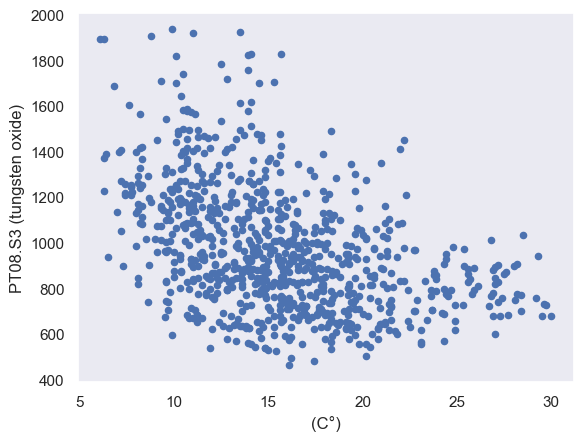

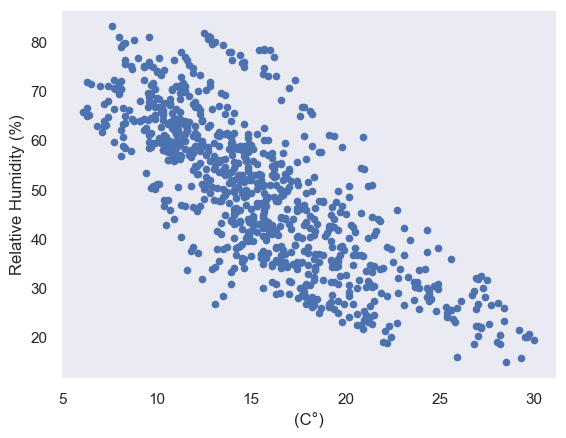

In [47]:

data.plot(kind='scatter', x='T', y='PT08_S3_NOX', xlabel= "(C°)", ylabel= "PT08.S3 (tungsten oxide)" )

#What a strong correlation looks like
### Relative Humidity (%)
data.plot(kind='scatter', x='T', y='RH',xlabel= "(C°)", ylabel="Relative Humidity (%)")

[Text(0.5, 0, 'T (C°'), Text(0, 0.5, 'PT08.S2 (Hourly avg. sensor response)')]

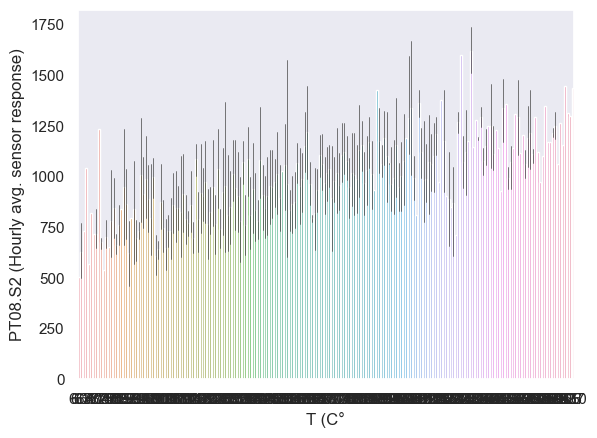

In [62]:
sns.barplot(data,x='T',y='PT08_S2_NMHC',errwidth=0.5).set(xlabel='T (C°',ylabel='PT08.S2 (Hourly avg. sensor response)')


[Text(0.5, 0, 'T (C°'), Text(0, 0.5, 'PT08.S3 (Hourly avg. sensor response)')]

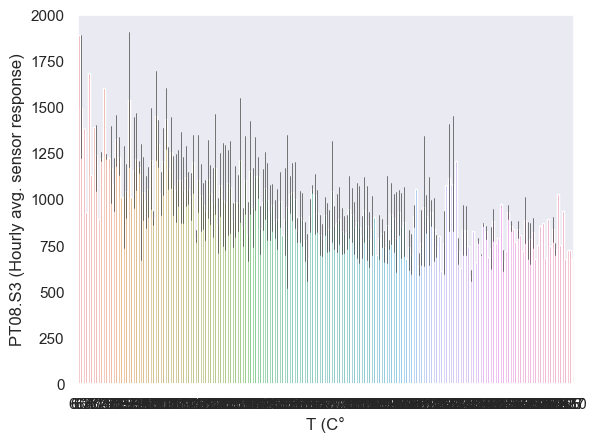

In [60]:
sns.barplot(data,x='T',y='PT08_S3_NOX',errwidth=0.5).set(xlabel='T (C°',ylabel='PT08.S3 (Hourly avg. sensor response)')

[Text(0.5, 0, 'T (C°'), Text(0, 0.5, 'RH (Hourly avg. sensor response)')]

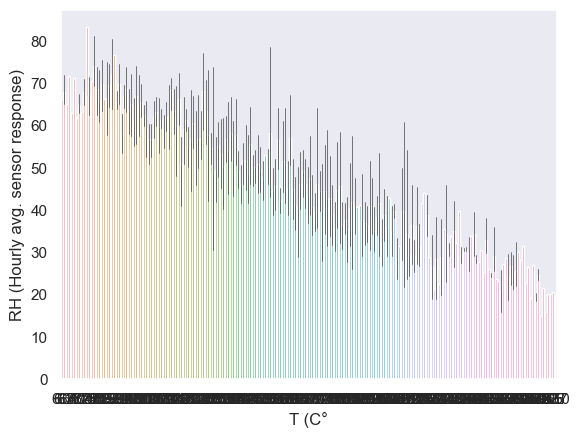

In [59]:
sns.barplot(data,x='T',y='RH',errwidth=0.5).set(xlabel='T (C°',ylabel='RH (Hourly avg. sensor response)')
